In [193]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
# Codebook for the stroke dataset
codebook = {
    "attribute": [
        "Data ID",
        "Gender",
        "Age",
        "Hypertension",
        "Heart Disease",
        "Ever Married",
        "Work Type",
        "Residence Type",
        "Avg Glucose Level",
        "BMI",
        "Smoking Status",
        "Stroke"
    ],
    "unit": ["-", "-", "years", "-", "-", "-", "-", "-", "mg/dL", "kg/m^2", "-", "-"],
    "dtype": ["int64", "category", "int64", "int64", "int64", "category", "category", "category", "float64", "float64", "category", "int64"],
    "description": [
        "Unique identifier for each data entry",
        "Gender of the individual (Male/Female)",
        "Age of the individual in years",
        "Whether the individual has hypertension (0 = No, 1 = Yes)",
        "Whether the individual has heart disease (0 = No, 1 = Yes)",
        "Whether the individual has ever been married (Yes/No)",
        "Type of work the individual is engaged in",
        "Type of residence (Urban/Rural)",
        "Average glucose level in the blood",
        "Body Mass Index (BMI) of the individual",
        "Smoking status of the individual",
        "Whether the individual had a stroke (0 = No, 1 = Yes)"
    ]
}



In [195]:
stroke=pd.read_csv('stroke.csv')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [196]:
stroke.shape

(5110, 12)

In [197]:
pd.DataFrame({
    "dtypes": stroke.dtypes
})

,dtypes
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


## EDA 

In [198]:
pd.DataFrame({
    "isna": stroke.isna().sum()
})

,isna
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [199]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


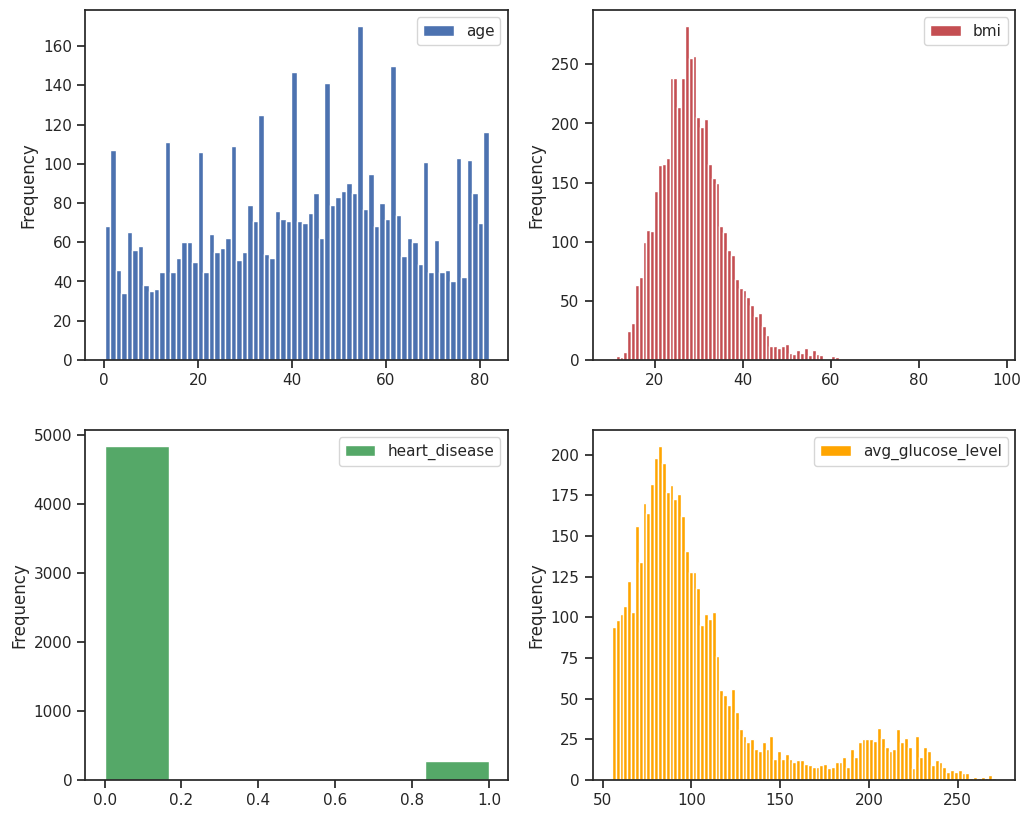

In [200]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
stroke.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
stroke.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
stroke.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
stroke.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

Text(0.5, 1.0, 'Boxplot distributies')

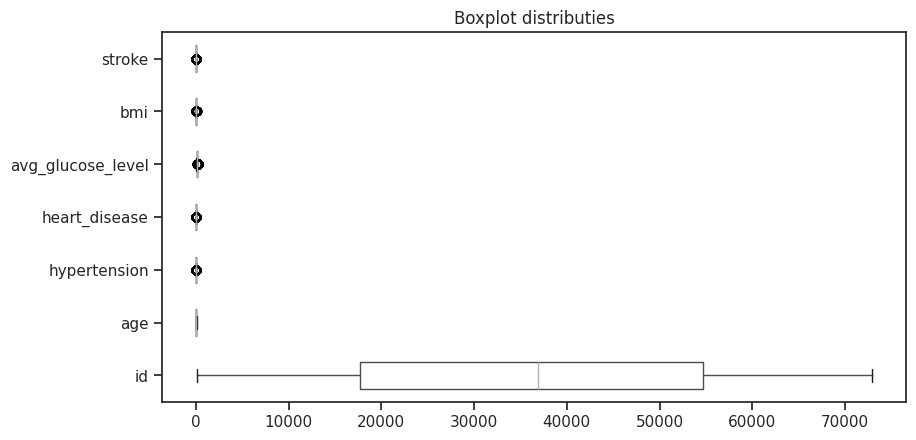

In [201]:
axs = stroke.boxplot(grid=False, vert=False, figsize=(9.6, 4.8))
axs.set_title("Boxplot distributies")

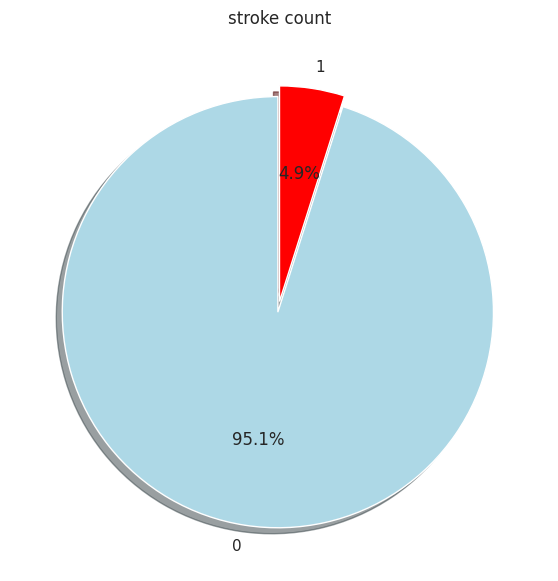

In [202]:
labels =stroke['stroke'].value_counts(sort = True).index
sizes = stroke['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('stroke count')
plt.show()

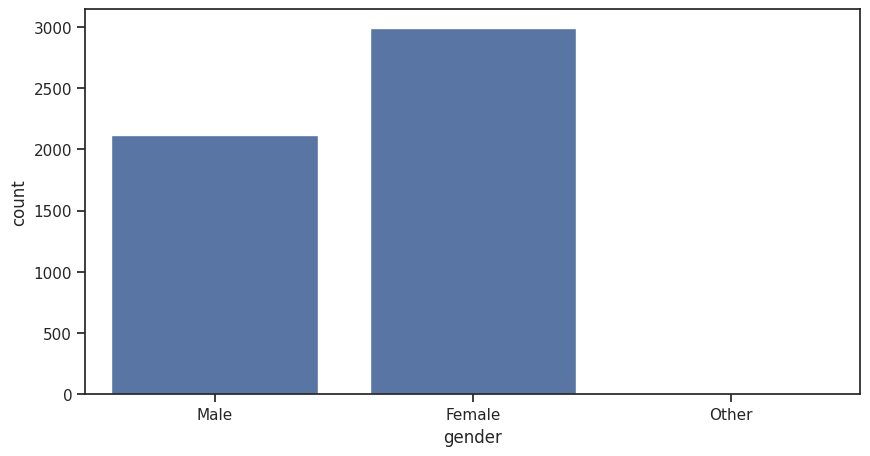

In [203]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='gender');

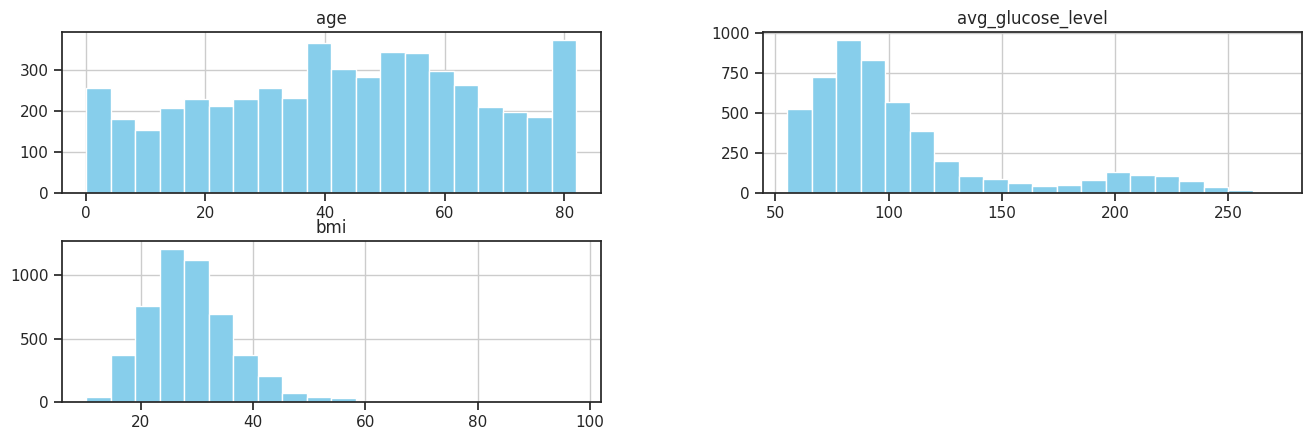

In [204]:
selected_columns = stroke[['age', 'avg_glucose_level', 'bmi']]

selected_columns.hist(bins=20, figsize=(16.0, 4.8), color='skyblue')
plt.show()

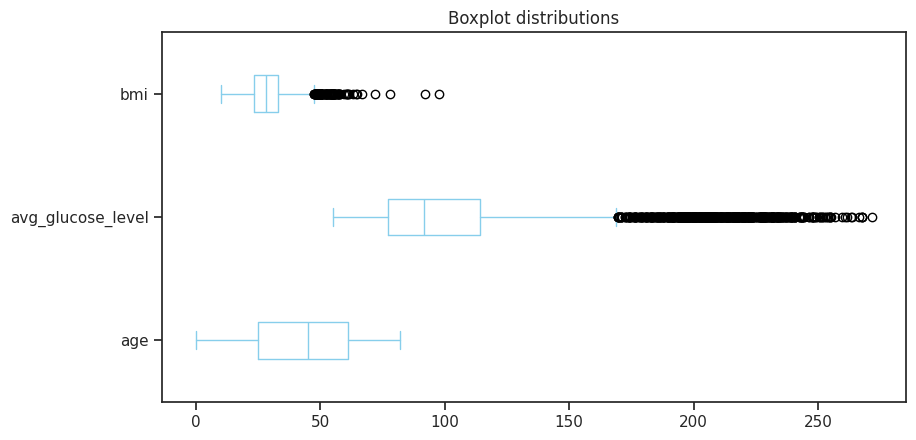

In [205]:
axs = selected_columns.boxplot(grid=False, vert=False, figsize=(9.6, 4.8), color='skyblue')
axs.set_title("Boxplot distributions")
plt.show()

/tmp/ipykernel_645843/2924090714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['bmi'], color = 'red')


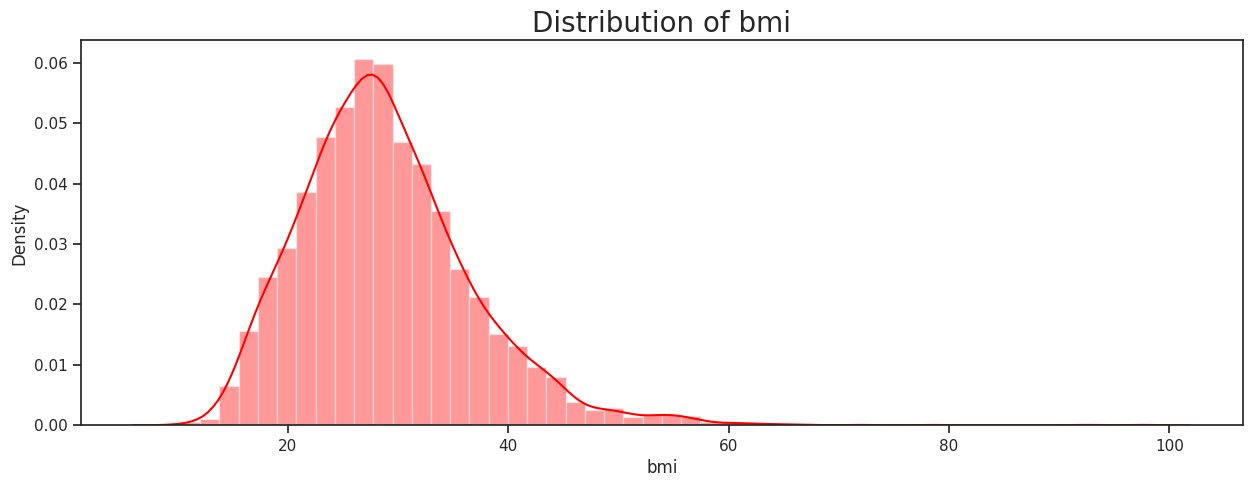

In [206]:
plt.subplots(figsize=(15,5))
sns.distplot(stroke['bmi'], color = 'red')
plt.title('Distribution of bmi', fontsize = 20)
plt.show()

/tmp/ipykernel_645843/3829582433.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['avg_glucose_level'], color = 'cyan')


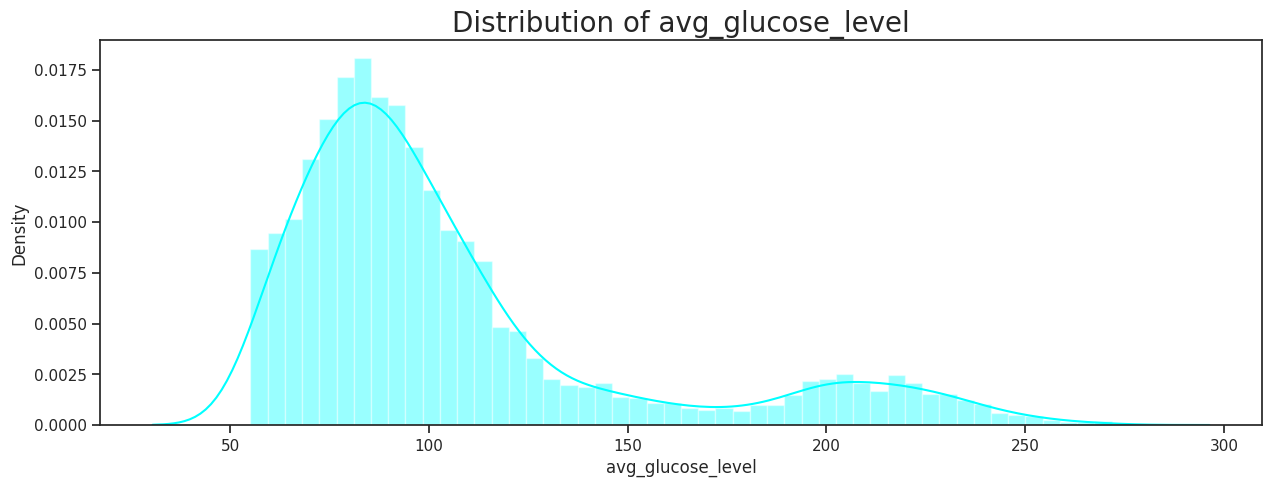

In [207]:
plt.subplots(figsize=(15,5))
sns.distplot(stroke['avg_glucose_level'], color = 'cyan')
plt.title('Distribution of avg_glucose_level', fontsize = 20)
plt.show()

## bivariaat

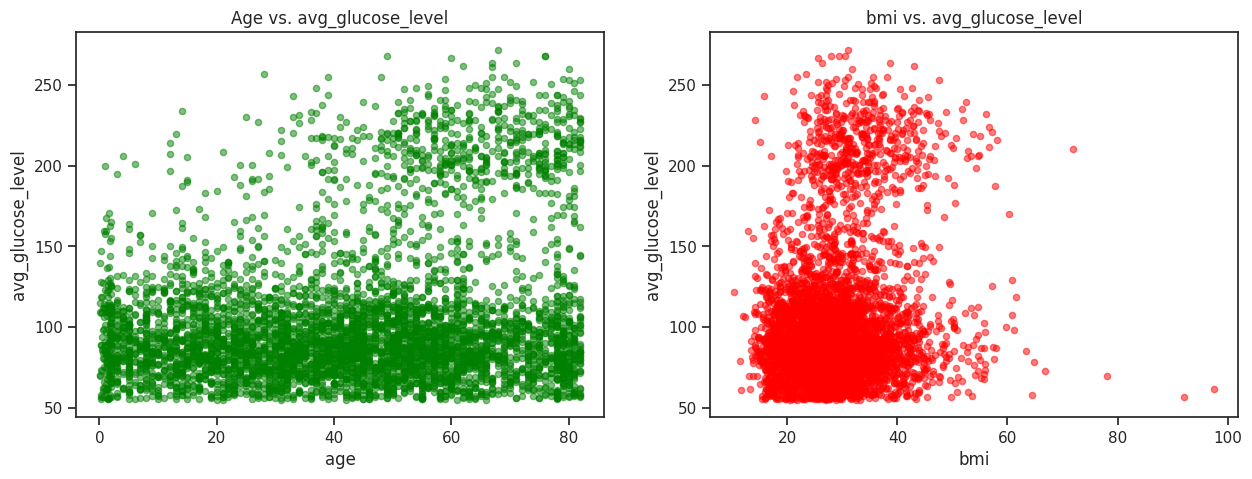

In [208]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
stroke.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
stroke.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

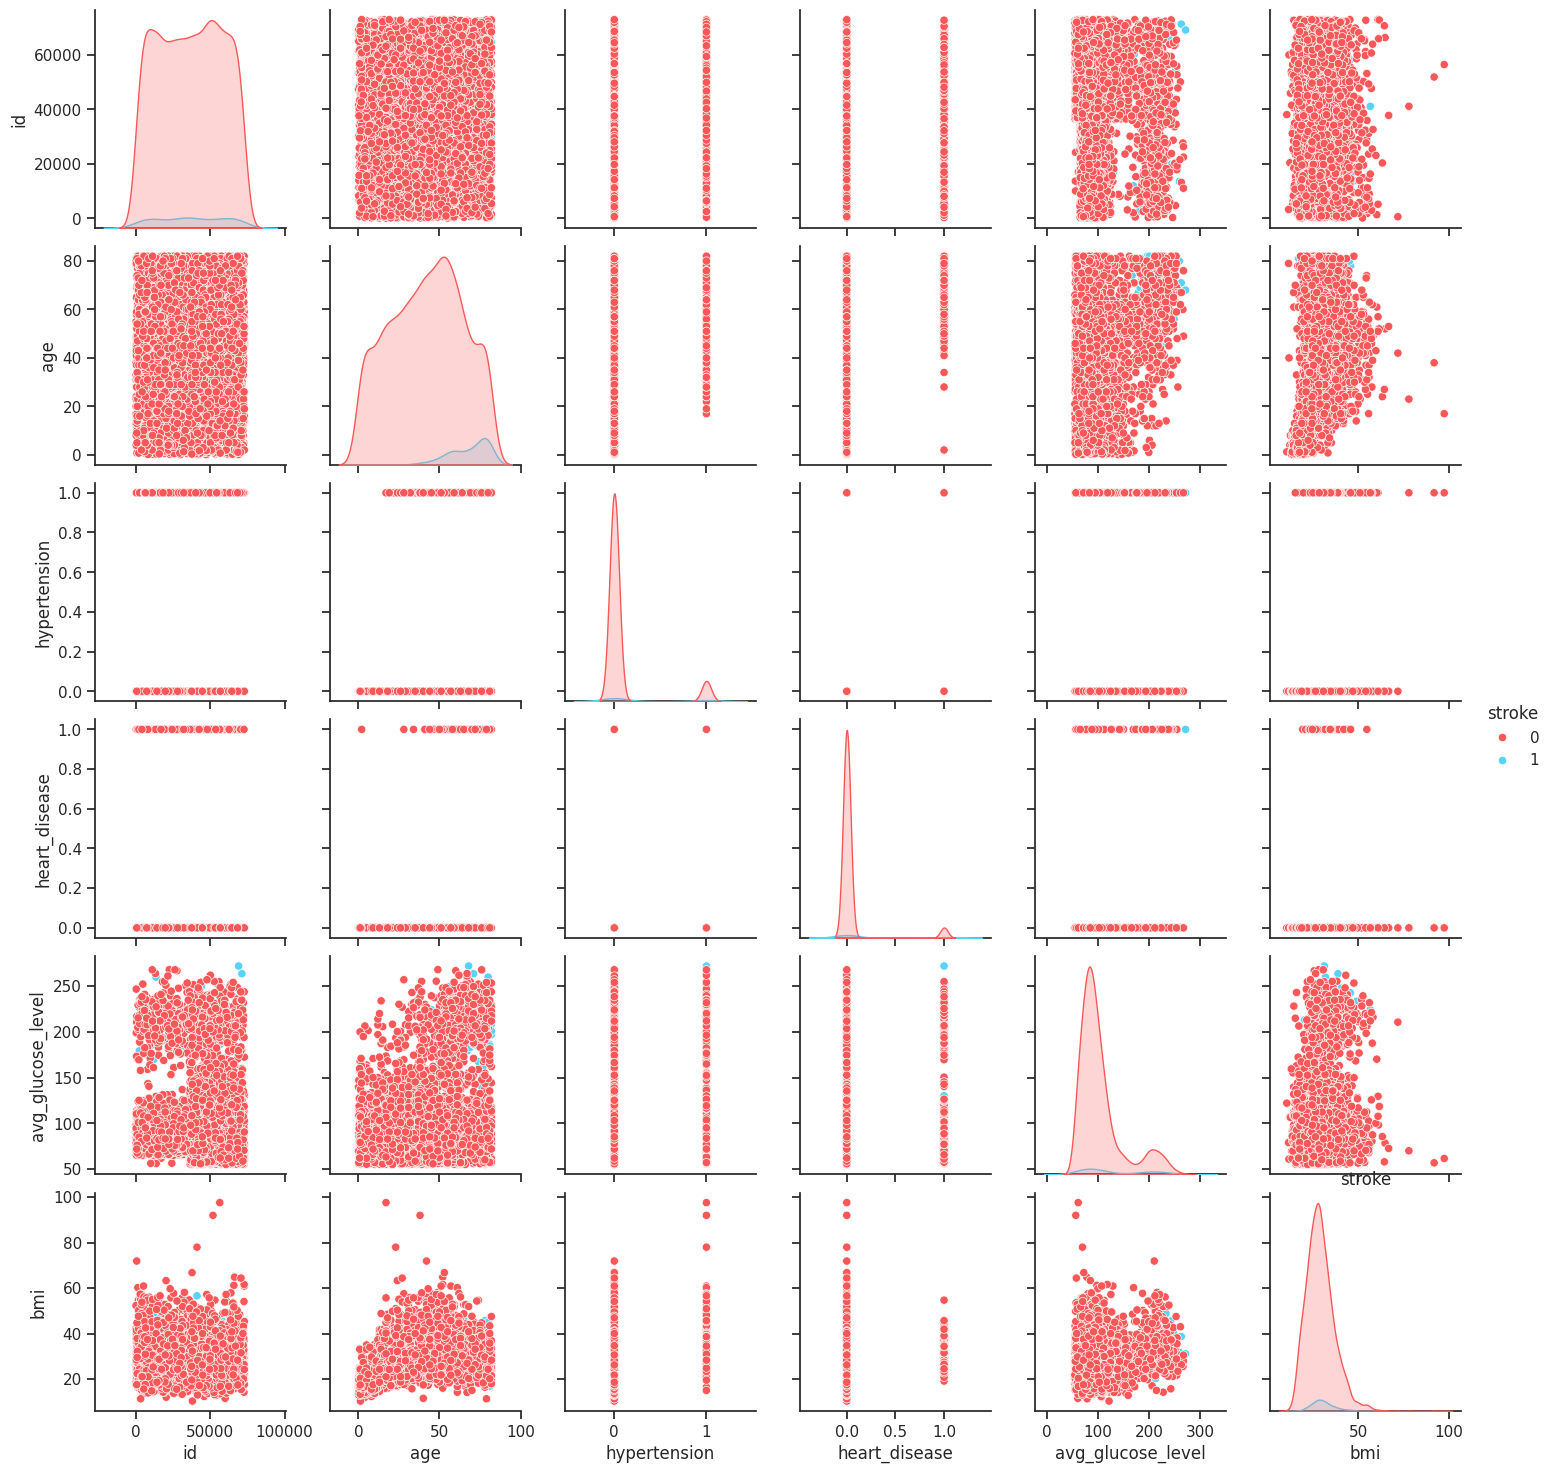

In [209]:
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(stroke, hue="stroke", palette=pal);
plt.title("stroke");

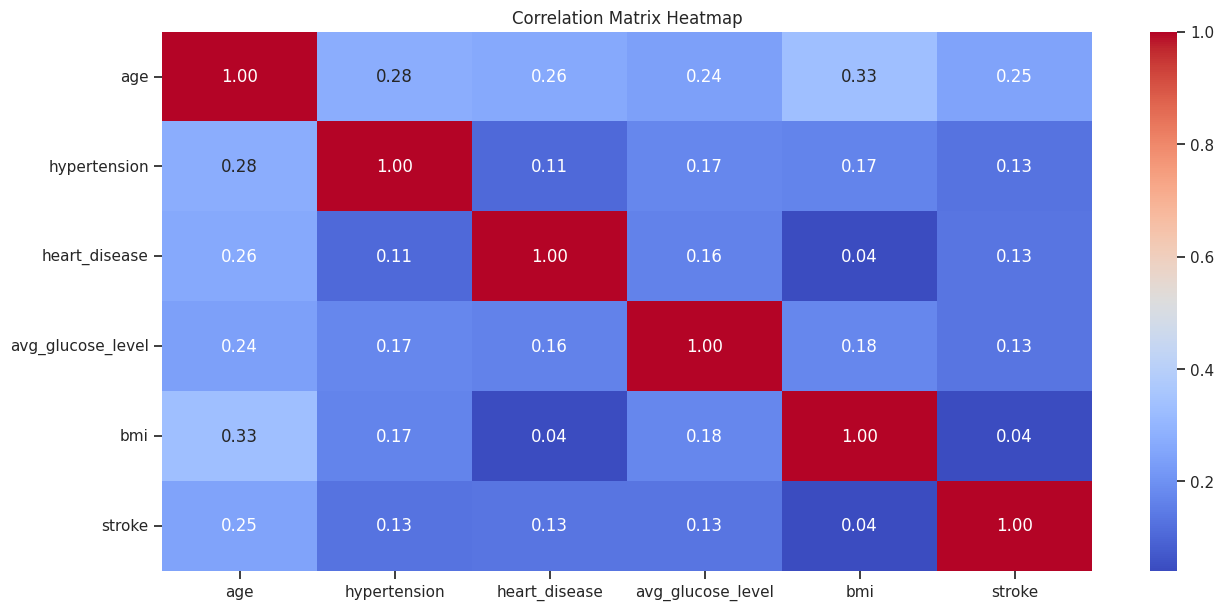

In [210]:
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
stroke_numeric = stroke[numerical_columns]

plt.figure(figsize=(15, 7))
sns.heatmap(stroke_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


BMI heeft veel outliers fixen 

In [211]:
bmi_outliers=stroke.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [212]:
# mean with outliers 
print(bmi_outliers['stroke'].value_counts())

stroke
0    78
1     1
Name: count, dtype: int64


In [213]:
stroke['bmi'].fillna(stroke['bmi'].mean(),inplace=True)

/tmp/ipykernel_645843/2265430588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke['bmi'].fillna(stroke['bmi'].mean(),inplace=True)


In [214]:
print ("\nMissing values :  ", stroke.isnull().sum().values.sum())


Missing values :   0


In [215]:
cat_df = stroke[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

/tmp/ipykernel_645843/4000081667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok,x='ever_married',palette='inferno');


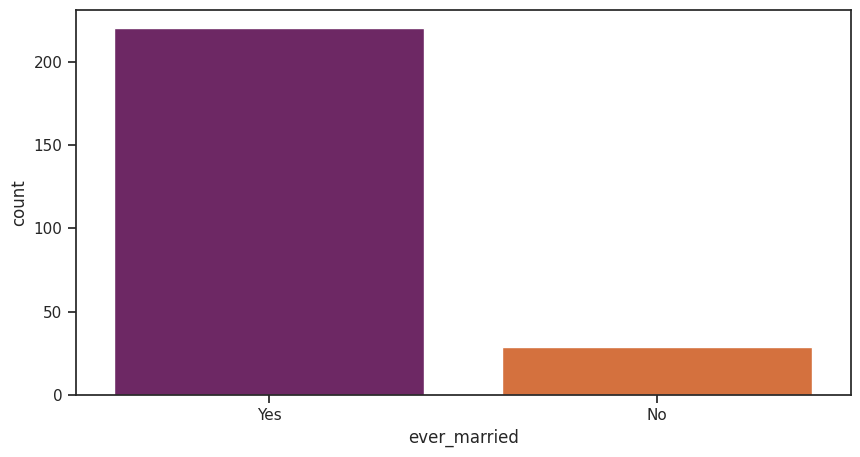

In [216]:
plt.figure(figsize=(10,5))
strok=stroke.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');

/tmp/ipykernel_645843/2186911349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok,x='work_type',palette='cool');


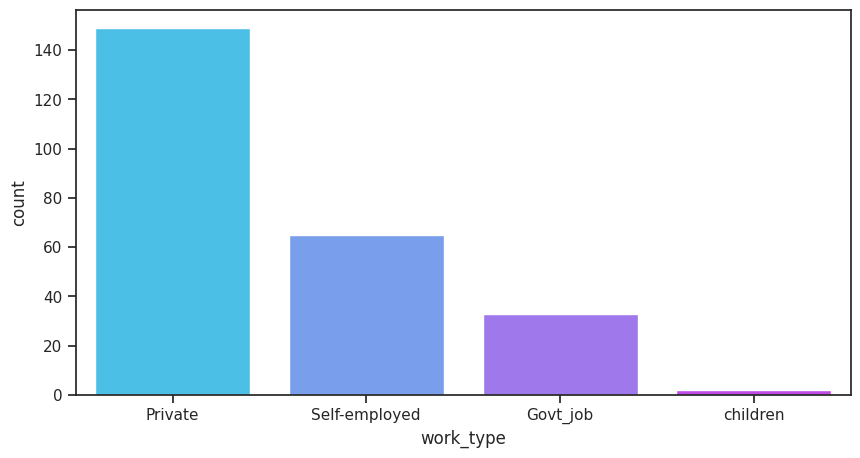

In [217]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');

/tmp/ipykernel_645843/1681554450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok,x='smoking_status',palette='autumn');


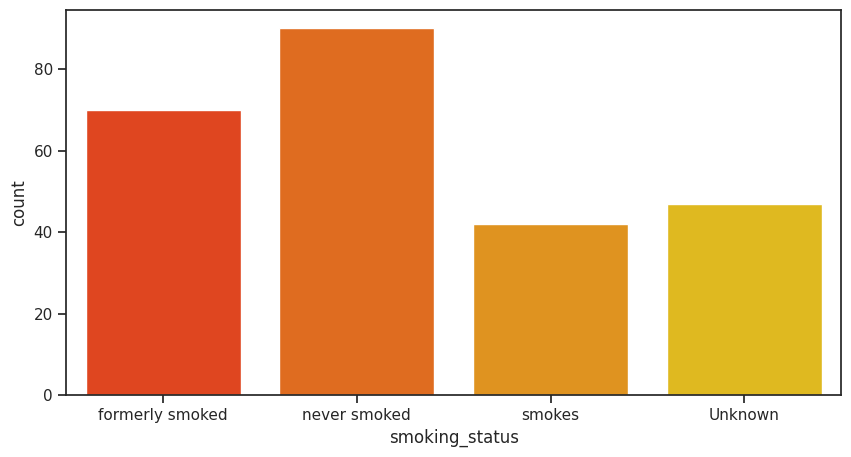

In [218]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');

/tmp/ipykernel_645843/1347171900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok,x='Residence_type',palette='Greens');


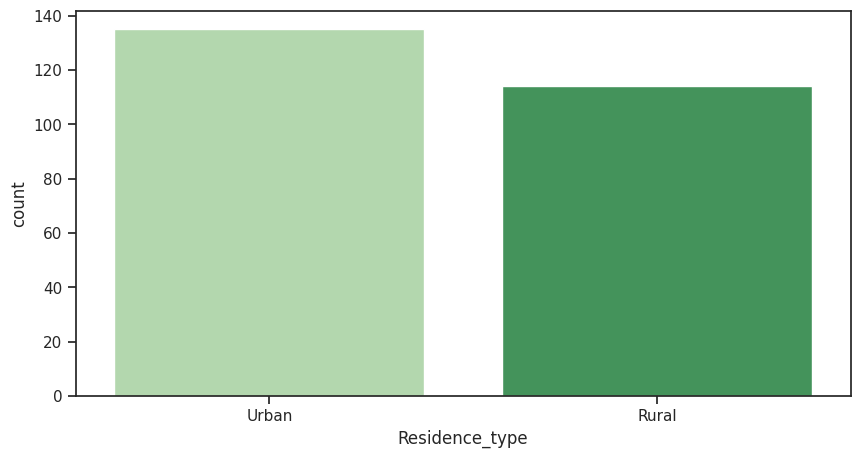

In [219]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');

/tmp/ipykernel_645843/3600220997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok,x='heart_disease',palette='Reds');


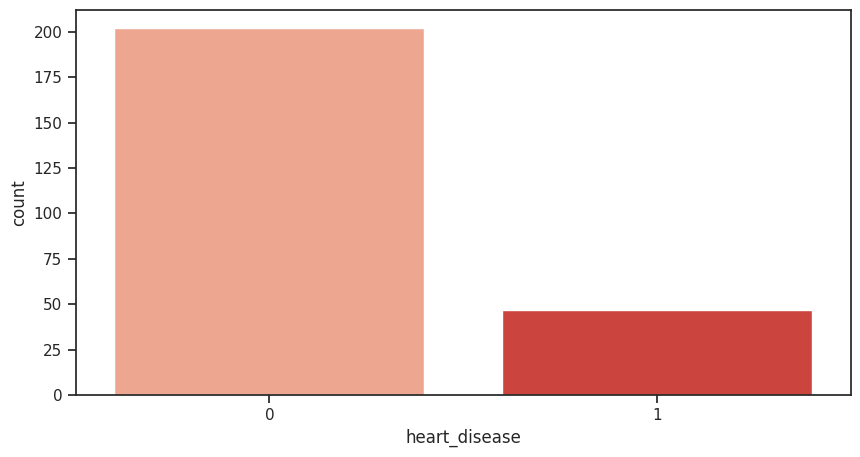

In [220]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

/tmp/ipykernel_645843/2920335477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok,x='hypertension',palette='Pastel2');


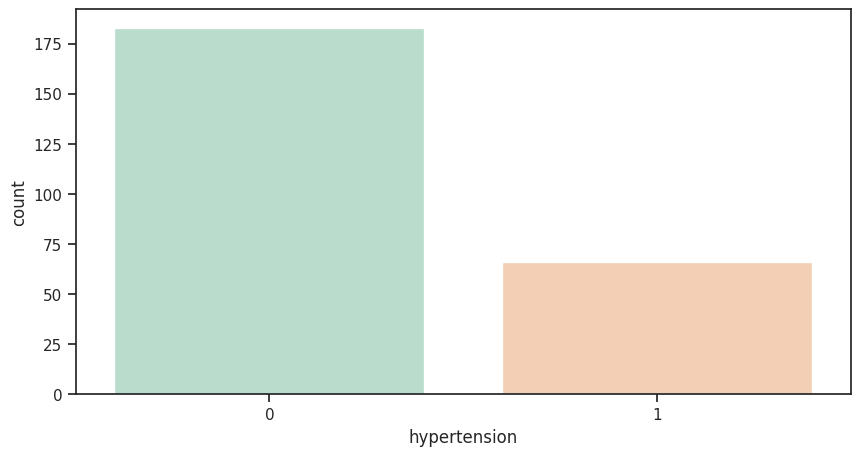

In [221]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

In [222]:
Ngroups = stroke["stroke"].nunique()
Ntotal = len(stroke.index)

from scipy import stats
def anova_stats(attribute):
    groupdata = [data[attribute].tolist() for _, data in stroke.groupby("stroke")]
    F, p = stats.f_oneway(*groupdata)
    η2 = F * (Ngroups-1) / (F * (Ngroups-1) + Ntotal-Ngroups)
    return F, p, η2

anova = {attribute: anova_stats(attribute) for attribute in stroke.select_dtypes(include='number').columns}

pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T

/tmp/ipykernel_645843/1520729213.py:7: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  F, p = stats.f_oneway(*groupdata)


,$F$,$p$,$\eta^2$
id,0.208459,6.479970e-01,0.000041
age,326.916568,7.030778e-71,0.060151
hypertension,84.953542,4.367557e-20,0.016359
heart_disease,94.698406,3.451927e-22,0.018202
avg_glucose_level,90.503870,2.767811e-21,0.017410
bmi,7.759776,5.361957e-03,0.001517
stroke,inf,0.000000e+00,NaN


In [228]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(stroke['gender'])
smoking_status=enc.fit_transform(stroke['smoking_status'])
work_type=enc.fit_transform(stroke['work_type'])
Residence_type=enc.fit_transform(stroke['Residence_type'])
ever_married=enc.fit_transform(stroke['ever_married'])

stroke['ever_married']=ever_married
stroke['Residence_type']=Residence_type
stroke['smoking_status']=smoking_status
stroke['gender']=gender
stroke['work_type']=work_type

In [229]:
stroke[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


### multivariate

In [238]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(stroke.select_dtypes(include='number'))

In [239]:
pd.DataFrame({
    'mean': np.mean(scaled, axis=0),
    'std': np.std(scaled, axis=0)
}, index=stroke.columns[0:12])

,mean,std
gender,-7.508671e-17,1.0
age,5.005781e-17,1.0
hypertension,-4.727682e-17,1.0
heart_disease,5.561978e-18,1.0
ever_married,-6.118176e-17,1.0
work_type,-2.113552e-16,1.0
Residence_type,-9.177264e-17,1.0
avg_glucose_level,1.001156e-16,1.0
bmi,2.224791e-17,1.0
smoking_status,5.561978e-18,1.0


In [240]:
from sklearn.decomposition import PCA

pca = PCA().fit(scaled)
components = pca.transform(scaled)

for n in range(4):
    attribute = f"PC-{n+1}"
    stroke[attribute] = components[:, n]
    anova[attribute] = anova_stats(attribute)

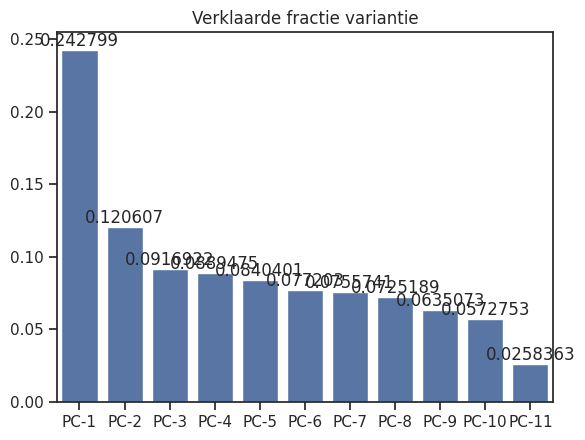

In [244]:
axs = sns.barplot(x=[f"PC-{n+1}" for n in range(11)], y=pca.explained_variance_ratio_)
axs.bar_label(axs.containers[0])
axs.set_title("Verklaarde fractie variantie");

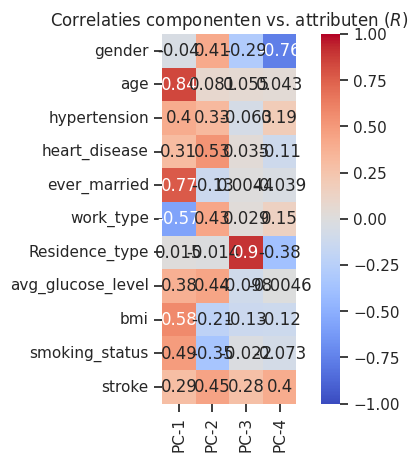

In [247]:
axs = sns.heatmap(stroke.corr().iloc[0:11, 11:22], annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0, square=True)
axs.set_title("Correlaties componenten vs. attributen ($R$)");

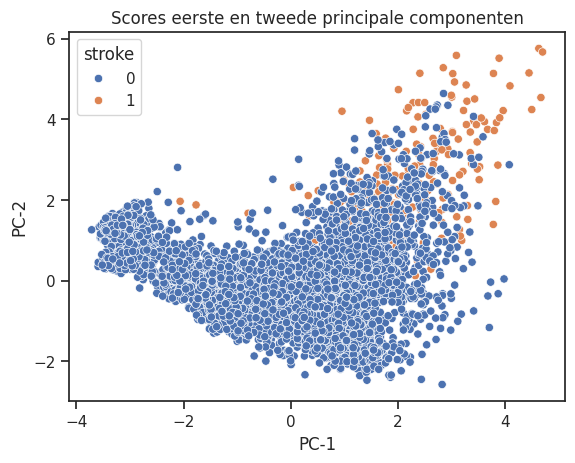

In [248]:
axs = sns.scatterplot(stroke, x="PC-1", y="PC-2", hue="stroke")
axs.set_title("Scores eerste en tweede principale componenten");

In [249]:
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T

,$F$,$p$,$\eta^2$
id,0.208459,6.479970e-01,0.000041
age,326.916568,7.030778e-71,0.060151
hypertension,84.953542,4.367557e-20,0.016359
heart_disease,94.698406,3.451927e-22,0.018202
avg_glucose_level,90.503870,2.767811e-21,0.017410
bmi,7.759776,5.361957e-03,0.001517
stroke,inf,0.000000e+00,NaN
PC-1,470.923064,5.845143e-100,0.084411
PC-2,1315.670558,1.534992e-256,0.204816
PC-3,420.009619,9.088667e-90,0.075978


In [250]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=Ngroups, n_init=100).fit(scaled)
stroke["Cluster"] = pd.Categorical(kmeans.labels_ + 1)   # Nummer vanaf één


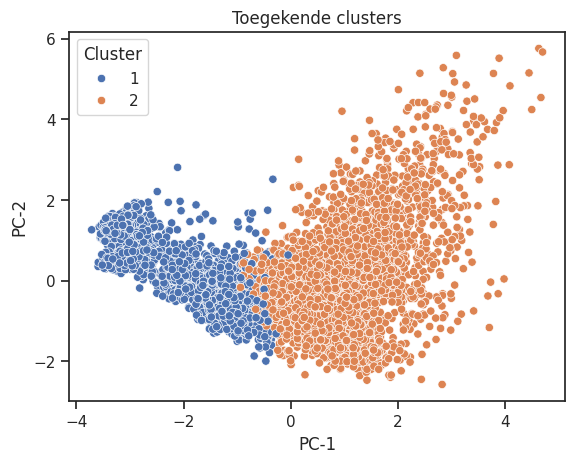

In [251]:
axs = sns.scatterplot(stroke, x="PC-1", y="PC-2", hue="Cluster")
axs.set_title("Toegekende clusters");

In [254]:
pd.crosstab(stroke["stroke"], stroke["Cluster"])

KeyError: 'Species [-]'

### data processing

In [231]:
#ID COLUMN IS NOT REQUIRED.
stroke = stroke.drop('id', axis=1)

In [232]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


## machine learning 

In [233]:
X = stroke.drop('stroke', axis=1)
y = stroke['stroke']

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3577, 10)
Number transactions y_train dataset:  (3577,)
Number transactions X_test dataset:  (1533, 10)
Number transactions y_test dataset:  (1533,)


In [236]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 3404 

After OverSampling, the shape of train_X: (6808, 10)
After OverSampling, the shape of train_y: (6808,) 

After OverSampling, counts of label '1': 3404
After OverSampling, counts of label '0': 3404


/tmp/ipykernel_645843/1121063873.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
